In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
import sys

In [3]:
sys.path.append('../')
from visualization_utils import *

In [4]:
area_bounds = np.load('../../../data/volume/area_bounds.npy')
layer_bounds = pd.read_pickle('../../../data/volume/layer_bounds.pkl')
pia = np.load('../../../data/volume/pia.npy')
wm = np.load('../../../data/volume/wm.npy')

In [5]:
df_neuron = pd.read_pickle('../../../data/data_tables/df_classifier.pkl')
df_morphos = pd.read_pickle('../../../data/data_tables/df_morphos.pkl')

df_neuron = pd.merge(
    df_neuron,
    df_morphos[
        [
            'segment_id',
            'split_index',
            'soma_x_align',
            'soma_y_align',
            'soma_z_align',
            'exclude',
            'depth_vs_basal_mean',
            'apical_total_skeletal_length',
        ]
    ],
    on=['segment_id', 'split_index'],
)

In [ ]:
df_neuron = df_neuron[~df_neuron.assigned_layer.isna()]
df_neuron = df_neuron[~df_neuron.exclude]

In [ ]:
len(df_neuron)

32571

#### Apical length

In [ ]:
df_neuron['apical_total_skeletal_length'].min(), df_neuron[
    'apical_total_skeletal_length'
].max()

(0.0, 6024.296)

In [ ]:
name = 'apical_total_skeletal_length'
targets, percentile = compute_percentiles(name, df_neuron)
df_neuron[f'{name}_perc'] = targets

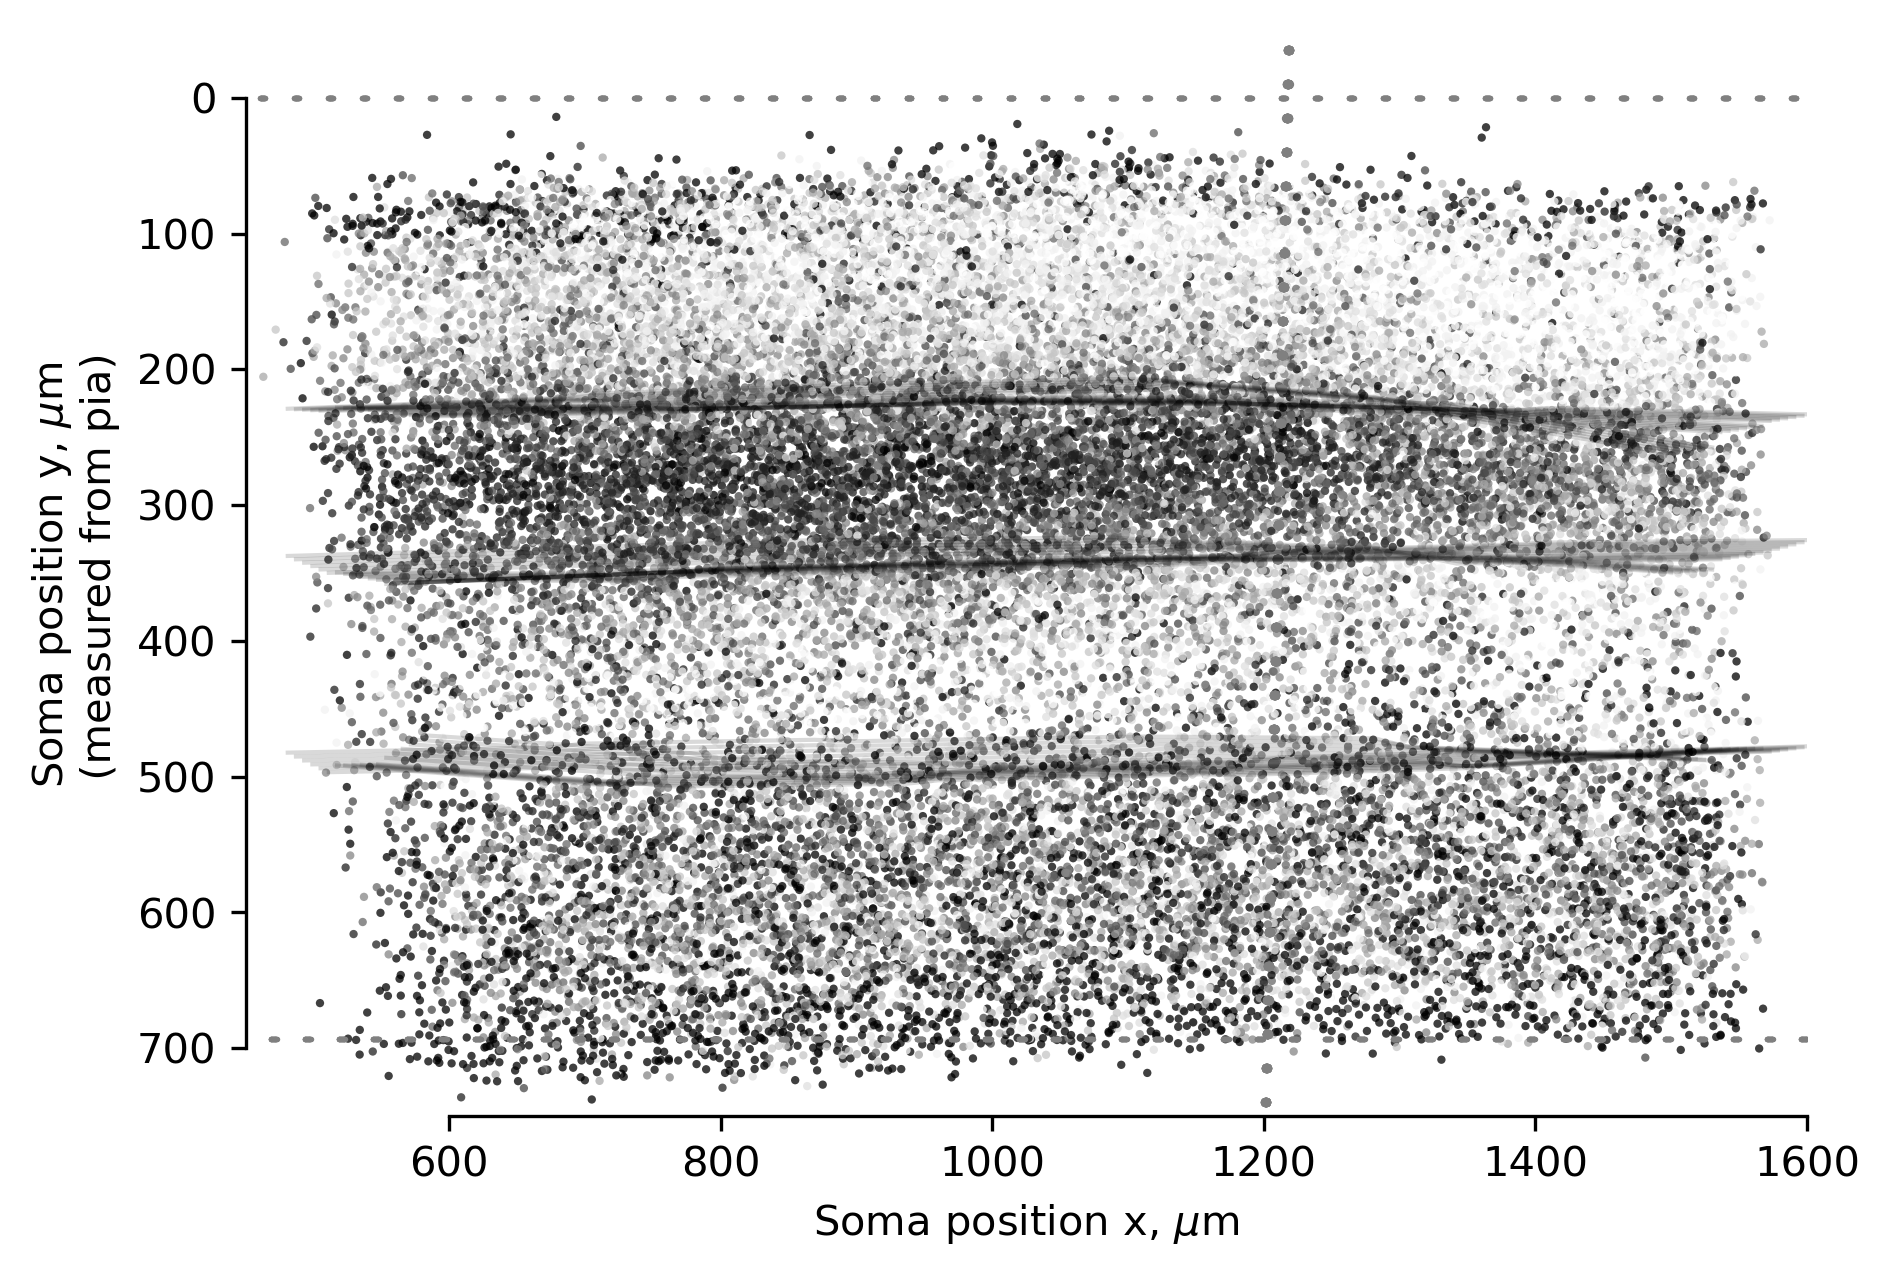

In [15]:
fig, ax = plt.subplots(1, 1, dpi=300)

# Plot soma centroids colored by apical length.
sns.scatterplot(
    data=df_neuron,
    x='soma_x_align',
    y='soma_y_align',
    ax=ax,
    hue='apical_total_skeletal_length_perc',
    s=4,
    palette='Greys_r',
    rasterized=True,
    linewidth=0,
    hue_order=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    alpha=0.75,
    legend=False,
)

# Plot area bounds.
sns.scatterplot(
    x=area_bounds[:, 0], y=area_bounds[:, 1], ax=ax, c='gray', s=5, linewidth=0
)

# Plot layer bounds.
lw = 1
for layer in ['L23/L4', 'L4/L5', 'L5/L6']:
    for line in layer_bounds[layer]:
        ax.plot(*line[:, [0, 1]].T, color='k', lw=lw, alpha=0.15)

# Plot pia and white matter.
s = 0.1
ax.scatter(*pia[:, [0, 1]].T, s=s, color='gray')
ax.scatter(*wm[:, [0, 1]].T, s=s, color='gray')

# Format plot.
ax.invert_yaxis()
ax.set_aspect('equal')
fig.set_tight_layout('tight')
ax.set_ylim(750, -50)
ax.set_xlim(450, 1600)
ax.set_xlabel('Soma position x, $\mu$m')
ax.set_ylabel('Soma position y, $\mu$m \n (measured from pia)')
sns.despine(trim=10)


# fig.savefig('./figures/Fig6A.pdf', bbox_inches='tight', dpi=300)

#### Basal bias

In [15]:
df_neuron['depth_vs_basal_mean'].min(), df_neuron['depth_vs_basal_mean'].max()

(-200.54698202110393, 139.02062042538623)

In [16]:
name = 'depth_vs_basal_mean'
targets, percentile = compute_percentiles(name, df_neuron)
df_neuron[f'{name}_perc'] = targets

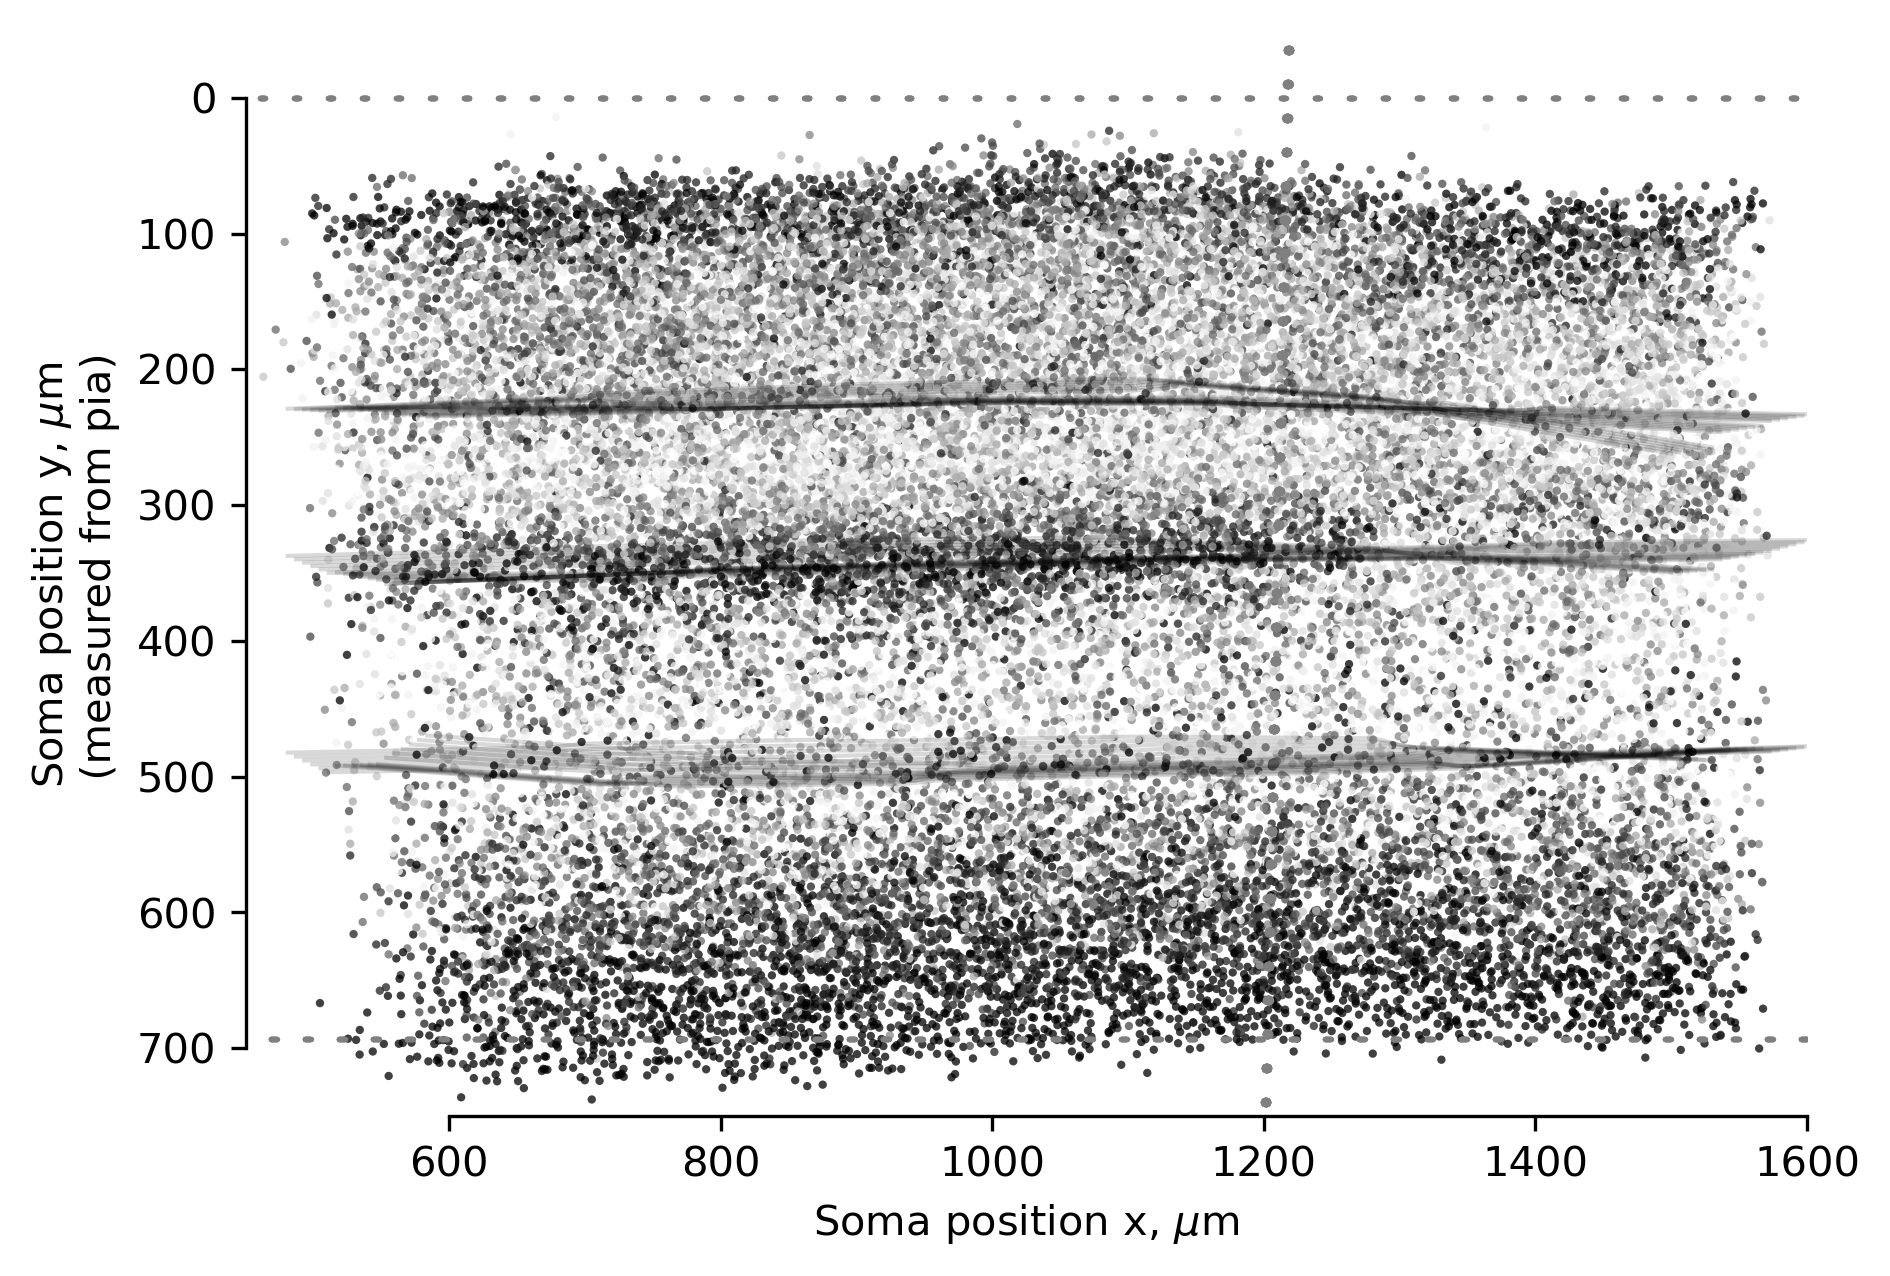

In [18]:
fig, ax = plt.subplots(1, 1, dpi=300)

# Plot soma centroids colored by basal bias.
sns.scatterplot(
    data=df_neuron,
    x='soma_x_align',
    y='soma_y_align',
    ax=ax,
    hue='depth_vs_basal_mean_perc',
    s=4,
    palette='Greys_r',
    rasterized=True,
    linewidth=0,
    hue_order=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    alpha=0.75,
    legend=False,
)

# Plot area bounds.
sns.scatterplot(
    x=area_bounds[:, 0], y=area_bounds[:, 1], ax=ax, c='gray', s=5, linewidth=0
)

# Plot layer bounds.
lw = 1
for layer in ['L23/L4', 'L4/L5', 'L5/L6']:
    for line in layer_bounds[layer]:
        ax.plot(*line[:, [0, 1]].T, color='k', lw=lw, alpha=0.15)

# Plot pia and white matter.
s = 0.1
ax.scatter(*pia[:, [0, 1]].T, s=s, color='gray')
ax.scatter(*wm[:, [0, 1]].T, s=s, color='gray')

# Format plot.
ax.invert_yaxis()
ax.set_aspect('equal')
fig.set_tight_layout('tight')
ax.set_ylim(750, -50)
ax.set_xlim(450, 1600)
ax.set_xlabel('Soma position x, $\mu$m')
ax.set_ylabel('Soma position y, $\mu$m \n (measured from pia)')
sns.despine(trim=10)


# fig.savefig('./figures/Fig7A.pdf', bbox_inches='tight', dpi=300)